# Se realiza un análisis de sentimientos como parte del EDA a partir de los DataFrames limpios resultantes de el ETL

In [113]:
import pandas as pd
from IPython.display import display

# Ruta al archivo CSV
archivo_csv = "C:/Users/Fede/Desktop/ETL/RestoYelp.csv"

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(archivo_csv)

# Mostrar el DataFrame utilizando display
display(df)

,name,city,state,review_count,attributes,categories,review_id,user_id,business_id,stars_y,text,anio,mes,dia
0,Starbucks,Nashville,PA,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Restaurants, Coffee & Tea, Food",ULzbgT5SPThiMOoo4a_Adw,veBX5roHQLNnQ1rTtNh_gg,aJvxWyQIG5OLfBw3qAe8xA,3.0,ordered caramel frappe at drive thru big mista...,2017,12,29
1,Starbucks,Nashville,PA,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Restaurants, Coffee & Tea, Food",aIkwHOOldvkQFo6-_EU4Yw,pk4-sSsNYqYSv8qc089XzA,aJvxWyQIG5OLfBw3qAe8xA,3.0,yummy but the staff refused to make a frappaci...,2017,5,26
2,Starbucks,Nashville,PA,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Restaurants, Coffee & Tea, Food",gW3uDzBeK7k0Syo1G8J4ng,A62iFtb1vndS4_p2hpp0tg,aJvxWyQIG5OLfBw3qAe8xA,3.0,i went in there about 2 weeks ago for sandwich...,2017,1,30
3,Starbucks,Nashville,PA,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Restaurants, Coffee & Tea, Food",0Hju4nEV3PREEaKaC_KSHw,eqQQDwdusuyucKwW8T9_zQ,aJvxWyQIG5OLfBw3qAe8xA,3.0,this starbucks took 25 minutes and 4 tries to ...,2017,12,5
4,Starbucks,Nashville,PA,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Restaurants, Coffee & Tea, Food",BWSiU-YDCw6Fti7UMHI1ag,fmTRm9lxmWHp6olH_YxeOA,aJvxWyQIG5OLfBw3qAe8xA,3.0,im new to the area and ive been craving my sta...,2017,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38098,KFC,Edmonton,IN,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...","American (Traditional), Fast Food, Restaurants...",QLVR6EcBV2lD2JpJrP9N_Q,k5RiHhMsd7zT6gO-sa8CiQ,Tj9FmBCHd84kjAE9vcoBnw,1.0,the owner is the biggest ahole ever he gave me...,2021,10,13
38099,KFC,Edmonton,IN,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...","American (Traditional), Fast Food, Restaurants...",cf3ft8457oGoiu9rW49cDQ,cS5J5Lw1xECApPjmk6dyJg,Tj9FmBCHd84kjAE9vcoBnw,1.0,ask for breasts and im always told there are n...,2021,11,3
38100,KFC,Edmonton,IN,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...","American (Traditional), Fast Food, Restaurants...",nGLcmo0D3IKrqqgK1kutlA,baGaUEUuXYQvTR9h4n9VKw,Tj9FmBCHd84kjAE9vcoBnw,1.0,the chicken we ordered was cold wasnt even a f...,2021,12,26
38101,Subway,Green Valley,FL,6,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Fast Food, Sandwiches, Restaurants",xFMhYYCB8IAzBfhm5Qod4w,wqeGcKWbtQLyavwtq26iww,iZjH7SKfiPSplPIHvbhwtQ,4.5,weve all probably been to a subway once or twi...,2021,10,28


In [112]:
import numpy as np
import datetime
import re #Expresiones regulares

In [111]:
df.isnull().sum()

Categoría               0
Sentimiento Promedio    0
dtype: int64

# Selección de columnas con las que se va a trabajar

In [114]:
df=df[['name','state','review_count','attributes','business_id','stars_y','text', 'categories', 'anio', 'mes', 'dia']]

In [108]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = df.dtypes

# Mostrar los tipos de datos
print(tipos_de_datos)

Categoría                object
Sentimiento Promedio    float64
dtype: object


In [115]:
# Cambiar los tipos de datos
df['name'] = df['name'].astype(str)
df['state'] = df['state'].astype(str)
df['attributes'] = df['attributes'].astype(str)
df['text'] = df['text'].astype(str)
df['categories'] = df['categories'].astype(str)
df['anio'] = df['anio'].astype(int)
df['mes'] = df['mes'].astype(int)
df['dia'] = df['dia'].astype(int)

# Verificar los nuevos tipos de datos
tipos_de_datos_actualizados = df.dtypes
print(tipos_de_datos_actualizados)

name             object
state            object
review_count      int64
attributes       object
business_id      object
stars_y         float64
text             object
categories       object
anio              int32
mes               int32
dia               int32
dtype: object


# Se pasa a todo a minúsculas para las columnas name,categories y text

In [116]:
df['name']=df['name'].apply(lambda x: x.lower())
df['state']=df['state'].apply(lambda x: x.lower())
df['categories']=df['categories'].apply(lambda x: x.lower() if x is not None else '')
df['text']=df['text'].apply(lambda x: x.lower() if x is not None else '')
df 

,name,state,review_count,attributes,business_id,stars_y,text,categories,anio,mes,dia
0,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,ordered caramel frappe at drive thru big mista...,"restaurants, coffee & tea, food",2017,12,29
1,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,yummy but the staff refused to make a frappaci...,"restaurants, coffee & tea, food",2017,5,26
2,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,i went in there about 2 weeks ago for sandwich...,"restaurants, coffee & tea, food",2017,1,30
3,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,this starbucks took 25 minutes and 4 tries to ...,"restaurants, coffee & tea, food",2017,12,5
4,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,im new to the area and ive been craving my sta...,"restaurants, coffee & tea, food",2017,6,20
...,...,...,...,...,...,...,...,...,...,...,...
38098,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,the owner is the biggest ahole ever he gave me...,"american (traditional), fast food, restaurants...",2021,10,13
38099,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,ask for breasts and im always told there are n...,"american (traditional), fast food, restaurants...",2021,11,3
38100,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,the chicken we ordered was cold wasnt even a f...,"american (traditional), fast food, restaurants...",2021,12,26
38101,subway,fl,6,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",iZjH7SKfiPSplPIHvbhwtQ,4.5,weve all probably been to a subway once or twi...,"fast food, sandwiches, restaurants",2021,10,28


In [118]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fede\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
# Calcular el promedio de valores nulos por columna
promedio_nulos_por_columna = df.isnull().mean()

# Mostrar el promedio de valores nulos por columna
print(promedio_nulos_por_columna)

name            0.0
state           0.0
review_count    0.0
attributes      0.0
business_id     0.0
stars_y         0.0
text            0.0
categories      0.0
anio            0.0
mes             0.0
dia             0.0
dtype: float64


# Quitamos las stopwords

In [120]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words(['spanish', 'english'])

# Función para tokenizar y filtrar stopwords
def tokenize_and_filter(text):
    words = text.split()  # Divide la cadena en palabras
    filtered_words = [word for word in words if word.lower() not in stopwords]  # Filtra las stopwords
    return filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
top_N=300

In [122]:
df['filtrado'] = df['text'].apply(tokenize_and_filter)
df

,name,state,review_count,attributes,business_id,stars_y,text,categories,anio,mes,dia,filtrado
0,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,ordered caramel frappe at drive thru big mista...,"restaurants, coffee & tea, food",2017,12,29,"[ordered, caramel, frappe, drive, thru, big, m..."
1,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,yummy but the staff refused to make a frappaci...,"restaurants, coffee & tea, food",2017,5,26,"[yummy, staff, refused, make, frappacino, orde..."
2,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,i went in there about 2 weeks ago for sandwich...,"restaurants, coffee & tea, food",2017,1,30,"[went, 2, weeks, ago, sandwich, drink, use, al..."
3,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,this starbucks took 25 minutes and 4 tries to ...,"restaurants, coffee & tea, food",2017,12,5,"[starbucks, took, 25, minutes, 4, tries, give,..."
4,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,im new to the area and ive been craving my sta...,"restaurants, coffee & tea, food",2017,6,20,"[im, new, area, ive, craving, starbucks, littl..."
...,...,...,...,...,...,...,...,...,...,...,...,...
38098,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,the owner is the biggest ahole ever he gave me...,"american (traditional), fast food, restaurants...",2021,10,13,"[owner, biggest, ahole, ever, gave, much, atti..."
38099,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,ask for breasts and im always told there are n...,"american (traditional), fast food, restaurants...",2021,11,3,"[ask, breasts, im, always, told, none, chicken..."
38100,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,the chicken we ordered was cold wasnt even a f...,"american (traditional), fast food, restaurants...",2021,12,26,"[chicken, ordered, cold, wasnt, even, full, ch..."
38101,subway,fl,6,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",iZjH7SKfiPSplPIHvbhwtQ,4.5,weve all probably been to a subway once or twi...,"fast food, sandwiches, restaurants",2021,10,28,"[weve, probably, subway, twice, normally, woul..."


In [123]:
# Cambiar la columna 'text' a tipo 'str'
df['text'] = df['text'].astype(str)

# Verificar el nuevo tipo de datos de la columna 'text'
tipo_de_datos_text = df['text'].dtype
print(tipo_de_datos_text)

object


In [124]:
# Convertir la columna 'text' a una lista de palabras
words = df['text'].astype(str).str.split().tolist()
words = [word for list_ in words for word in list_]

# Mostrar las primeras 10 palabras como ejemplo
print(words[:10])

['ordered', 'caramel', 'frappe', 'at', 'drive', 'thru', 'big', 'mistake', 'took', '30']


In [125]:
word_dist= nltk.FreqDist(words)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frecuencia'])
rslt

,Word,Frecuencia
0,the,147614
1,and,102931
2,i,102685
3,to,90971
4,a,70027
...,...,...
295,management,1586
296,name,1585
297,car,1576
298,else,1575


In [126]:
categorias_palabras_clave = {
    'Restaurante': ['restaurant','pizza','bar','food','takeout','coffee','delivery','venue','sandwich','cafe','mexican','breakfast','diner'],
    'Agencia': ['agency'],
    'Fotógrafo': ['photographer'],
    'Auto': ['transportation','auto','repair','car','truck','tire','motorcycle','trailer','mechanic','chevrolet'],
    'Belleza_Spa':['salon','beauty','hair','nail','spa','barber','waxing','massage'],
    'Mascotas': ['pet','veterinarian','dog','animal'],
    'Salud': ['dentist','doctor','medical','health','dental','surgeon','pharmacy','drug','physician','hospital','optometrist','pathologist'],
    'Iglesia':['church','baptist','wedding','religious','catholic'],
    'Casa':['home','contractor','furniture'],
    'Oficina':['office','corporate'],
    'Escuela':['school'],
    'Banco':['bank','atm','ATM','money'],
    'Deportes':['sports','club','physical','gym','GYM','body','fitness','ski'],
    'Atraccion Turistica':['tourist', 'attraction','park'],
    'Tienda':['liquor','cell','phone','electronic','convenience'],
    'Sin Categoria':[''],
    'Hospedaje':['lodging','hotel'],
    'Fabrica':['fabric']

}

In [127]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

# Supongamos que ya tienes un DataFrame llamado 'df' con la columna 'text'

# Descargar las palabras vacías (stop words) de NLTK si no las tienes ya
nltk.download('stopwords')

# Obtener la lista de palabras vacías en inglés de NLTK
stop_words = set(stopwords.words('english'))

# Definir la cantidad de palabras más comunes que deseas obtener
top_N = 300

# Función para tokenizar el texto y filtrar las palabras comunes
def tokenize_and_filter(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]
    return filtered_words

# Aplicar la función a la columna 'text' y combinar todas las palabras en una sola lista
all_words = df['text'].apply(tokenize_and_filter).sum()

# Calcular la frecuencia de las palabras
word_dist = FreqDist(all_words)

# Obtener las 300 palabras más comunes
top_words = word_dist.most_common(top_N)

# Crear un DataFrame con las palabras más comunes y sus frecuencias
rslt = pd.DataFrame(top_words, columns=['Word', 'Frecuencia'])

# Mostrar el DataFrame resultante
print(rslt)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         Word  Frecuencia
0       order       22595
1         get       14617
2        time       13559
3        food       13380
4         one       13166
..        ...         ...
295      late        1097
296  favorite        1078
297     young        1078
298     given        1077
299     often        1073

[300 rows x 2 columns]


In [128]:
# Guardar el DataFrame 'rslt' en un archivo CSV llamado "resultado.csv"
rslt.to_csv('resultado.csv', index=False)

In [129]:
# Seleccionar un número de palabras clave (por ejemplo, las 10 palabras más comunes)
numero_de_palabras_clave = 10

# Obtener las palabras clave
palabras_clave = rslt['Word'].head(numero_de_palabras_clave)

# Crear una nueva columna 'categorias_palabras_clave' en el DataFrame original
df['categorias_palabras_clave'] = df['text'].apply(lambda text: [word for word in text.split() if word in palabras_clave])

# Mostrar el DataFrame resultante con la nueva categoría
print(df[['text', 'categorias_palabras_clave']])

                                                    text  \
0      ordered caramel frappe at drive thru big mista...   
1      yummy but the staff refused to make a frappaci...   
2      i went in there about 2 weeks ago for sandwich...   
3      this starbucks took 25 minutes and 4 tries to ...   
4      im new to the area and ive been craving my sta...   
...                                                  ...   
38098  the owner is the biggest ahole ever he gave me...   
38099  ask for breasts and im always told there are n...   
38100  the chicken we ordered was cold wasnt even a f...   
38101  weve all probably been to a subway once or twi...   
38102  first time there was yesterday for lunch our s...   

      categorias_palabras_clave  
0                            []  
1                            []  
2                            []  
3                            []  
4                            []  
...                         ...  
38098                        []  
38099  

In [130]:
# Definir el diccionario de categorías de palabras clave con 10 adjetivos calificativos para cada categoría
categorias_palabras_clave = {
    'Limpieza': ['clean', 'tidy', 'spotless', 'immaculate', 'hygienic', 'sanitary', 'neat', 'orderly', 'sterile', 'pristine'],
    'Comida': ['tasty', 'delicious', 'flavorful', 'delectable', 'scrumptious', 'mouthwatering', 'savory', 'appetizing', 'yummy', 'gastronomic'],
    'Atención': ['excellent', 'outstanding', 'attentive', 'helpful', 'courteous', 'impeccable', 'professional', 'friendly', 'exceptional', 'top-notch'],
    'Servicio': ['efficient', 'prompt', 'reliable', 'attentive', 'quick', 'responsive', 'helpful', 'courteous', 'professional', 'exemplary'],
    'Staff': ['friendly', 'helpful', 'attentive', 'knowledgeable', 'courteous', 'professional', 'welcoming', 'accommodating', 'approachable', 'responsive'],
}

# Función para asignar categorías basadas en palabras clave
def asignar_categoria(texto):
    for categoria, palabras_clave in categorias_palabras_clave.items():
        for palabra_clave in palabras_clave:
            if palabra_clave.lower() in texto.lower():
                return categoria
    return 'Sin Categoria'

# Aplicar la función a la columna 'text' para crear 'categorias_palabras_clave'
df['categorias_palabras_clave'] = df['text'].apply(asignar_categoria)

# Mostrar el DataFrame resultante con la nueva columna de categorías
print(df[['text', 'categorias_palabras_clave']])

                                                    text  \
0      ordered caramel frappe at drive thru big mista...   
1      yummy but the staff refused to make a frappaci...   
2      i went in there about 2 weeks ago for sandwich...   
3      this starbucks took 25 minutes and 4 tries to ...   
4      im new to the area and ive been craving my sta...   
...                                                  ...   
38098  the owner is the biggest ahole ever he gave me...   
38099  ask for breasts and im always told there are n...   
38100  the chicken we ordered was cold wasnt even a f...   
38101  weve all probably been to a subway once or twi...   
38102  first time there was yesterday for lunch our s...   

      categorias_palabras_clave  
0                 Sin Categoria  
1                        Comida  
2                 Sin Categoria  
3                 Sin Categoria  
4                 Sin Categoria  
...                         ...  
38098             Sin Categoria  
38099  

In [131]:
def clasificar_categorias(categorias):
    for categoria, palabras_clave in categorias_palabras_clave.items():
        for palabra_clave in palabras_clave:
            if palabra_clave in categorias:
                return categoria
    return 'Otros'  # Si no se encuentra ninguna categoría, se clasifica como 'otros'

In [132]:
# Aplicar la función a la columna 'categorias' y crear una nueva columna 'clasificacion'
df['clasificacion'] = df['filtrado'].apply(clasificar_categorias)

In [133]:
df[df['clasificacion']=='Otros']

,name,state,review_count,attributes,business_id,stars_y,text,categories,anio,mes,dia,filtrado,categorias_palabras_clave,clasificacion
0,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,ordered caramel frappe at drive thru big mista...,"restaurants, coffee & tea, food",2017,12,29,"[ordered, caramel, frappe, drive, thru, big, m...",Sin Categoria,Otros
2,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,i went in there about 2 weeks ago for sandwich...,"restaurants, coffee & tea, food",2017,1,30,"[went, 2, weeks, ago, sandwich, drink, use, al...",Sin Categoria,Otros
3,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,this starbucks took 25 minutes and 4 tries to ...,"restaurants, coffee & tea, food",2017,12,5,"[starbucks, took, 25, minutes, 4, tries, give,...",Sin Categoria,Otros
4,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,im new to the area and ive been craving my sta...,"restaurants, coffee & tea, food",2017,6,20,"[im, new, area, ive, craving, starbucks, littl...",Sin Categoria,Otros
5,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,incredibly rude and incompetent staff weve bee...,"restaurants, coffee & tea, food",2017,2,11,"[incredibly, rude, incompetent, staff, weve, s...",Sin Categoria,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38097,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,this particular location is so painfully slowa...,"american (traditional), fast food, restaurants...",2018,4,1,"[particular, location, painfully, slowalways, ...",Sin Categoria,Otros
38098,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,the owner is the biggest ahole ever he gave me...,"american (traditional), fast food, restaurants...",2021,10,13,"[owner, biggest, ahole, ever, gave, much, atti...",Sin Categoria,Otros
38099,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,ask for breasts and im always told there are n...,"american (traditional), fast food, restaurants...",2021,11,3,"[ask, breasts, im, always, told, none, chicken...",Sin Categoria,Otros
38100,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,the chicken we ordered was cold wasnt even a f...,"american (traditional), fast food, restaurants...",2021,12,26,"[chicken, ordered, cold, wasnt, even, full, ch...",Sin Categoria,Otros


In [134]:
df.to_csv('Analisis1Yelp.csv', index=False )

In [135]:
from textblob import TextBlob

In [136]:
# Crear una nueva columna 'Sentiment' para almacenar los resultados del análisis de sentimiento
df['Sentimiento'] = df['text'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

In [137]:
# Clasificar el sentimiento en categorías (positivo, neutral, negativo)
def categorizar_sentimiento(polarity):
    if polarity > 0:
        return 'Positivo'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negativo'

df['Categ_Sentimiento'] = df['Sentimiento'].apply(categorizar_sentimiento)
df

,name,state,review_count,attributes,business_id,stars_y,text,categories,anio,mes,dia,filtrado,categorias_palabras_clave,clasificacion,Sentimiento,Categ_Sentimiento
0,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,ordered caramel frappe at drive thru big mista...,"restaurants, coffee & tea, food",2017,12,29,"[ordered, caramel, frappe, drive, thru, big, m...",Sin Categoria,Otros,0.000000,Neutral
1,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,yummy but the staff refused to make a frappaci...,"restaurants, coffee & tea, food",2017,5,26,"[yummy, staff, refused, make, frappacino, orde...",Comida,Comida,0.040926,Positivo
2,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,i went in there about 2 weeks ago for sandwich...,"restaurants, coffee & tea, food",2017,1,30,"[went, 2, weeks, ago, sandwich, drink, use, al...",Sin Categoria,Otros,0.232113,Positivo
3,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,this starbucks took 25 minutes and 4 tries to ...,"restaurants, coffee & tea, food",2017,12,5,"[starbucks, took, 25, minutes, 4, tries, give,...",Sin Categoria,Otros,-0.316667,Negativo
4,starbucks,pa,65,"{'BikeParking': 'False', 'RestaurantsPriceRang...",aJvxWyQIG5OLfBw3qAe8xA,3.0,im new to the area and ive been craving my sta...,"restaurants, coffee & tea, food",2017,6,20,"[im, new, area, ive, craving, starbucks, littl...",Sin Categoria,Otros,0.136911,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38098,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,the owner is the biggest ahole ever he gave me...,"american (traditional), fast food, restaurants...",2021,10,13,"[owner, biggest, ahole, ever, gave, much, atti...",Sin Categoria,Otros,-0.066667,Negativo
38099,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,ask for breasts and im always told there are n...,"american (traditional), fast food, restaurants...",2021,11,3,"[ask, breasts, im, always, told, none, chicken...",Sin Categoria,Otros,-0.083333,Negativo
38100,kfc,in,5,"{'DriveThru': 'True', 'RestaurantsTakeOut': 'T...",Tj9FmBCHd84kjAE9vcoBnw,1.0,the chicken we ordered was cold wasnt even a f...,"american (traditional), fast food, restaurants...",2021,12,26,"[chicken, ordered, cold, wasnt, even, full, ch...",Sin Categoria,Otros,-0.364583,Negativo
38101,subway,fl,6,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",iZjH7SKfiPSplPIHvbhwtQ,4.5,weve all probably been to a subway once or twi...,"fast food, sandwiches, restaurants",2021,10,28,"[weve, probably, subway, twice, normally, woul...",Atención,Atención,0.259167,Positivo


# Muestra el porcentaje de los comentarios positios y negativos por cadena

In [139]:
import pandas as pd

# Filtrar el DataFrame para obtener solo sentimientos positivos y negativos
df_filtrado = df[df['Categ_Sentimiento'].isin(['Positivo', 'Negativo'])]

# Agrupar el DataFrame filtrado por la columna "name"
grupos_restaurantes = df_filtrado.groupby('name')

# Calcular el porcentaje de sentimientos positivos y negativos para cada restaurante
porcentaje_positivos = grupos_restaurantes['Categ_Sentimiento'].apply(lambda x: (x == 'Positivo').sum() / len(x) * 100)
porcentaje_negativos = grupos_restaurantes['Categ_Sentimiento'].apply(lambda x: (x == 'Negativo').sum() / len(x) * 100)

# Crear un nuevo DataFrame con los resultados
resultados = pd.DataFrame({
    'Nombre del Restaurante': porcentaje_positivos.index,
    'Porcentaje de Sentimientos Positivos': porcentaje_positivos.values,
    'Porcentaje de Sentimientos Negativos': porcentaje_negativos.values
})

# Mostrar el resultado
display(resultados)

,Nombre del Restaurante,Porcentaje de Sentimientos Positivos,Porcentaje de Sentimientos Negativos
0,domino's pizza,46.933164,53.066836
1,kfc,36.578293,63.421707
2,mcdonald's,41.497078,58.502922
3,starbucks,67.779312,32.220688
4,subway,60.541516,39.458484


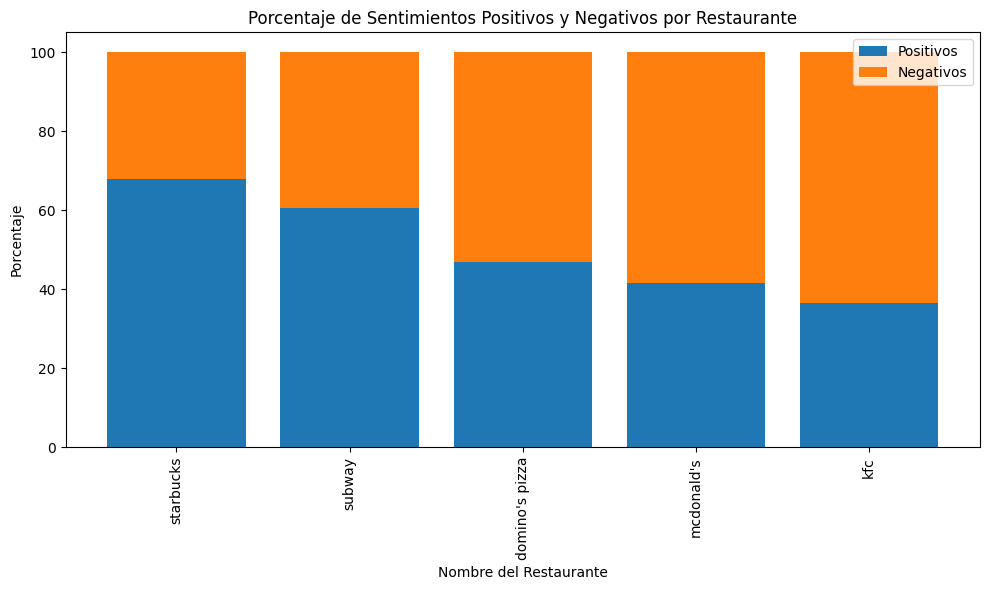

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo sentimientos positivos y negativos
df_filtrado = df[df['Categ_Sentimiento'].isin(['Positivo', 'Negativo'])]

# Agrupar el DataFrame filtrado por la columna "name"
grupos_restaurantes = df_filtrado.groupby('name')

# Calcular el porcentaje de sentimientos positivos y negativos para cada restaurante
porcentaje_positivos = grupos_restaurantes['Categ_Sentimiento'].apply(lambda x: (x == 'Positivo').sum() / len(x) * 100)
porcentaje_negativos = grupos_restaurantes['Categ_Sentimiento'].apply(lambda x: (x == 'Negativo').sum() / len(x) * 100)

# Crear un nuevo DataFrame con los resultados
resultados = pd.DataFrame({
    'Nombre del Restaurante': porcentaje_positivos.index,
    'Porcentaje de Sentimientos Positivos': porcentaje_positivos.values,
    'Porcentaje de Sentimientos Negativos': porcentaje_negativos.values
})

# Ordenar el DataFrame por el Porcentaje de Sentimientos Positivos para un gráfico más claro
resultados = resultados.sort_values(by='Porcentaje de Sentimientos Positivos', ascending=False)

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(resultados['Nombre del Restaurante'], resultados['Porcentaje de Sentimientos Positivos'], label='Positivos')
ax.bar(resultados['Nombre del Restaurante'], resultados['Porcentaje de Sentimientos Negativos'], bottom=resultados['Porcentaje de Sentimientos Positivos'], label='Negativos')

# Personalizar el gráfico
ax.set_xlabel('Nombre del Restaurante')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de Sentimientos Positivos y Negativos por Restaurante')
ax.legend()

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



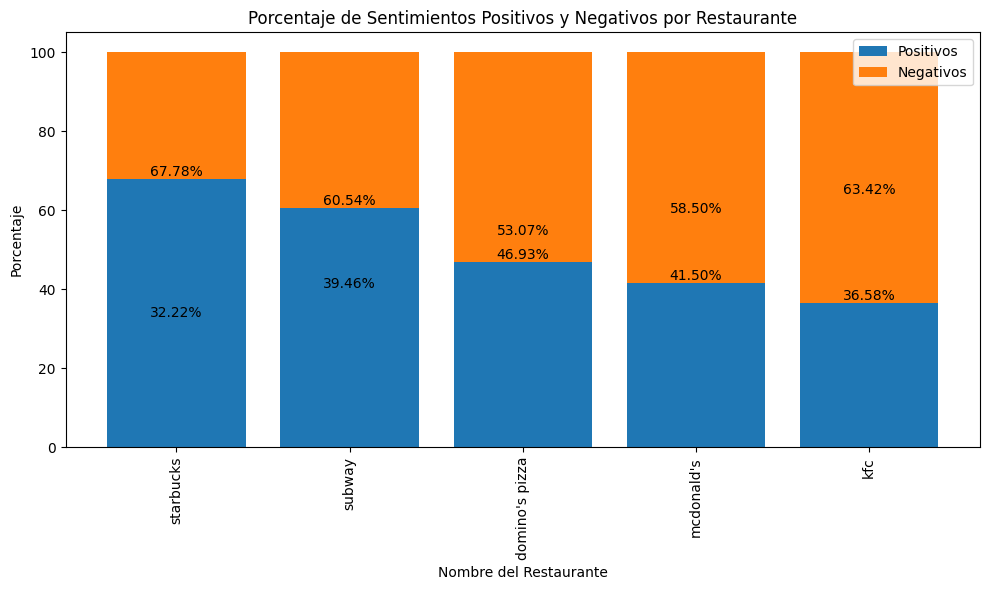

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo sentimientos positivos y negativos
df_filtrado = df[df['Categ_Sentimiento'].isin(['Positivo', 'Negativo'])]

# Agrupar el DataFrame filtrado por la columna "name"
grupos_restaurantes = df_filtrado.groupby('name')

# Calcular el porcentaje de sentimientos positivos y negativos para cada restaurante
porcentaje_positivos = grupos_restaurantes['Categ_Sentimiento'].apply(lambda x: (x == 'Positivo').sum() / len(x) * 100)
porcentaje_negativos = grupos_restaurantes['Categ_Sentimiento'].apply(lambda x: (x == 'Negativo').sum() / len(x) * 100)

# Crear un nuevo DataFrame con los resultados
resultados = pd.DataFrame({
    'Nombre del Restaurante': porcentaje_positivos.index,
    'Porcentaje de Sentimientos Positivos': porcentaje_positivos.values,
    'Porcentaje de Sentimientos Negativos': porcentaje_negativos.values
})

# Ordenar el DataFrame por el Porcentaje de Sentimientos Positivos para un gráfico más claro
resultados = resultados.sort_values(by='Porcentaje de Sentimientos Positivos', ascending=False)

# Crear un gráfico de barras apiladas con etiquetas de porcentaje
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(resultados['Nombre del Restaurante'], resultados['Porcentaje de Sentimientos Positivos'], label='Positivos')
bar2 = ax.bar(resultados['Nombre del Restaurante'], resultados['Porcentaje de Sentimientos Negativos'], bottom=resultados['Porcentaje de Sentimientos Positivos'], label='Negativos')

# Agregar etiquetas de porcentaje en cada barra
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

# Personalizar el gráfico
ax.set_xlabel('Nombre del Restaurante')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de Sentimientos Positivos y Negativos por Restaurante')
ax.legend()

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Muestra el porcentaje de sentimientos por por categoria

In [143]:
import pandas as pd

# Definir el diccionario de categorías de palabras clave con 10 adjetivos calificativos para cada categoría
categorias_palabras_clave = {
    'Limpieza': ['clean', 'tidy', 'spotless', 'immaculate', 'hygienic', 'sanitary', 'neat', 'orderly', 'sterile', 'pristine'],
    'Comida': ['tasty', 'delicious', 'flavorful', 'delectable', 'scrumptious', 'mouthwatering', 'savory', 'appetizing', 'yummy', 'gastronomic'],
    'Atención': ['excellent', 'outstanding', 'attentive', 'helpful', 'courteous', 'impeccable', 'professional', 'friendly', 'exceptional', 'top-notch'],
    'Servicio': ['efficient', 'prompt', 'reliable', 'attentive', 'quick', 'responsive', 'helpful', 'courteous', 'professional', 'exemplary'],
    'Staff': ['friendly', 'helpful', 'attentive', 'knowledgeable', 'courteous', 'professional', 'welcoming', 'accommodating', 'approachable', 'responsive'],
}

# Función para asignar categorías basadas en palabras clave
def asignar_categoria(texto):
    for categoria, palabras_clave in categorias_palabras_clave.items():
        for palabra_clave in palabras_clave:
            if palabra_clave.lower() in texto.lower():
                return categoria
    return 'Sin Categoria'

# Aplicar la función a la columna 'text' para crear 'categorias_palabras_clave'
df['categorias_palabras_clave'] = df['text'].apply(asignar_categoria)

# Filtrar el DataFrame para obtener solo sentimientos positivos y negativos
df_filtrado = df[df['Categ_Sentimiento'].isin(['Positivo', 'Negativo'])]

# Agrupar el DataFrame filtrado por la columna "categorias_palabras_clave"
grupos_categorias = df_filtrado.groupby('categorias_palabras_clave')

# Calcular el porcentaje de sentimientos positivos y negativos para cada categoría
porcentaje_positivos = grupos_categorias['Categ_Sentimiento'].apply(lambda x: (x == 'Positivo').sum() / len(x) * 100)
porcentaje_negativos = grupos_categorias['Categ_Sentimiento'].apply(lambda x: (x == 'Negativo').sum() / len(x) * 100)

# Crear un nuevo DataFrame con los resultados
resultados = pd.DataFrame({
    'Categoría': porcentaje_positivos.index,
    'Porcentaje de Sentimientos Positivos': porcentaje_positivos.values,
    'Porcentaje de Sentimientos Negativos': porcentaje_negativos.values
})

# Mostrar el resultado
display(resultados)

,Categoría,Porcentaje de Sentimientos Positivos,Porcentaje de Sentimientos Negativos
0,Atención,78.772905,21.227095
1,Comida,90.030519,9.969481
2,Limpieza,77.408221,22.591779
3,Servicio,70.575221,29.424779
4,Sin Categoria,41.788761,58.211239
5,Staff,75.147929,24.852071


# Muestra el porcentaje de sentimientos por por categoria y por restaurant

In [147]:
import pandas as pd

# Definir el diccionario de categorías de palabras clave con 10 adjetivos calificativos para cada categoría
categorias_palabras_clave = {
    'Limpieza': ['clean', 'tidy', 'spotless', 'immaculate', 'hygienic', 'sanitary', 'neat', 'orderly', 'sterile', 'pristine'],
    'Comida': ['tasty', 'delicious', 'flavorful', 'delectable', 'scrumptious', 'mouthwatering', 'savory', 'appetizing', 'yummy', 'gastronomic'],
    'Atención': ['excellent', 'outstanding', 'attentive', 'helpful', 'courteous', 'impeccable', 'professional', 'friendly', 'exceptional', 'top-notch'],
    'Servicio': ['efficient', 'prompt', 'reliable', 'attentive', 'quick', 'responsive', 'helpful', 'courteous', 'professional', 'exemplary'],
    'Staff': ['friendly', 'helpful', 'attentive', 'knowledgeable', 'courteous', 'professional', 'welcoming', 'accommodating', 'approachable', 'responsive'],
}

# Función para asignar categorías basadas en palabras clave
def asignar_categoria(texto):
    for categoria, palabras_clave in categorias_palabras_clave.items():
        for palabra_clave in palabras_clave:
            if palabra_clave.lower() in texto.lower():
                return categoria
    return 'Sin Categoria'

# Aplicar la función a la columna 'text' para crear 'categorias_palabras_clave'
df['categorias_palabras_clave'] = df['text'].apply(asignar_categoria)

# Filtrar el DataFrame para obtener solo sentimientos positivos y negativos
df_filtrado = df[df['Categ_Sentimiento'].isin(['Positivo', 'Negativo'])]

# Agrupar el DataFrame filtrado por la columna "name" y "categorias_palabras_clave"
grupos_categorias = df_filtrado.groupby(['name', 'categorias_palabras_clave'])

# Calcular el porcentaje de sentimientos positivos y negativos para cada categoría y cadena
porcentaje_positivos = grupos_categorias['Categ_Sentimiento'].apply(lambda x: (x == 'Positivo').sum() / len(x) * 100)
porcentaje_negativos = grupos_categorias['Categ_Sentimiento'].apply(lambda x: (x == 'Negativo').sum() / len(x) * 100)

# Crear un nuevo DataFrame con los resultados
resultados = pd.DataFrame({
    'Cadena': porcentaje_positivos.index.get_level_values('name'),
    'Categoría': porcentaje_positivos.index.get_level_values('categorias_palabras_clave'),
    'Porcentaje de Sentimientos Positivos': porcentaje_positivos.values,
    'Porcentaje de Sentimientos Negativos': porcentaje_negativos.values
})

# Filtrar las cadenas específicas que mencionaste (Domino's Pizza, KFC, McDonald's, Starbucks, Subway)
cadenas_especificas = ['Domino\'s Pizza', 'KFC', 'McDonald\'s', 'Starbucks', 'Subway']
resultados_filtrados = resultados[resultados['Cadena'].isin(cadenas_especificas)]

# Mostrar el resultado
display(resultados)

,Cadena,Categoría,Porcentaje de Sentimientos Positivos,Porcentaje de Sentimientos Negativos
0,domino's pizza,Atención,66.352941,33.647059
1,domino's pizza,Comida,92.201835,7.798165
2,domino's pizza,Limpieza,67.289720,32.710280
3,domino's pizza,Servicio,67.156863,32.843137
4,domino's pizza,Sin Categoria,40.392781,59.607219
5,domino's pizza,Staff,83.333333,16.666667
6,kfc,Atención,69.318182,30.681818
7,kfc,Comida,77.215190,22.784810
8,kfc,Limpieza,56.593407,43.406593
9,kfc,Servicio,66.666667,33.333333


# Mostrar el porcentaje por categoria para KFC

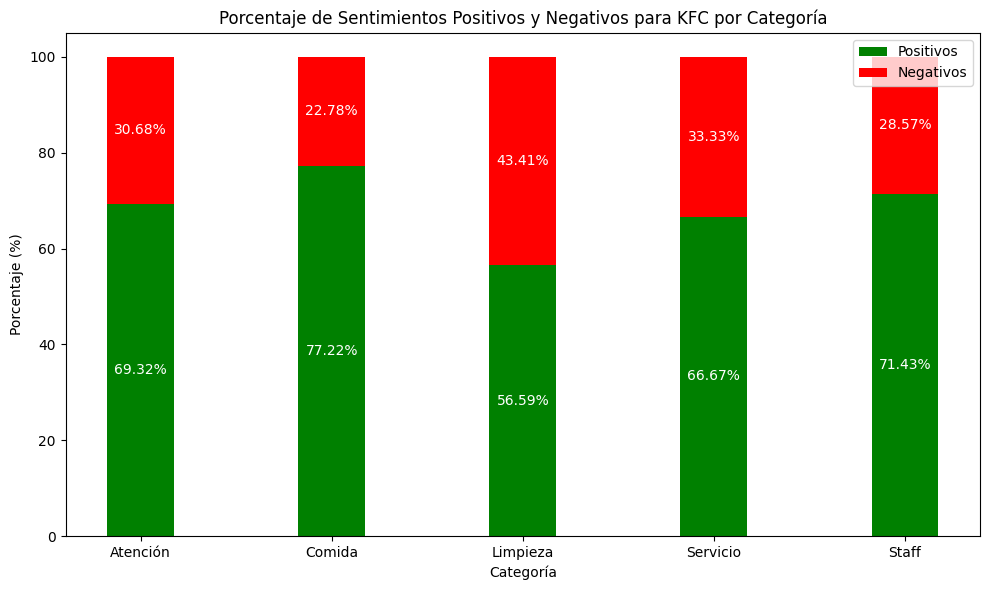

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos para KFC excluyendo la categoría "Sin Categoria"
data = {
    'Cadena': ['KFC', 'KFC', 'KFC', 'KFC', 'KFC'],
    'Categoría': ['Atención', 'Comida', 'Limpieza', 'Servicio', 'Staff'],
    'Porcentaje de Sentimientos Positivos': [69.32, 77.22, 56.59, 66.67, 71.43],
    'Porcentaje de Sentimientos Negativos': [30.68, 22.78, 43.41, 33.33, 28.57]
}

df_kfc = pd.DataFrame(data)

# Crear el gráfico de barras personalizado
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(df_kfc))

bar1 = ax.bar(index, df_kfc['Porcentaje de Sentimientos Positivos'], bar_width, label='Positivos', color='green')
bar2 = ax.bar(index, df_kfc['Porcentaje de Sentimientos Negativos'], bar_width, label='Negativos', color='red', bottom=df_kfc['Porcentaje de Sentimientos Positivos'])

# Mostrar el porcentaje en cada barra
for rect1, rect2 in zip(bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    total_height = height1 + height2
    ax.annotate(f'{height1:.2f}%', xy=(rect1.get_x() + rect1.get_width() / 2, height1 / 2), ha='center', va='center', color='white')
    ax.annotate(f'{height2:.2f}%', xy=(rect2.get_x() + rect2.get_width() / 2, height1 + height2 / 2), ha='center', va='center', color='white')

# Configurar el gráfico
ax.set_xlabel('Categoría')
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Porcentaje de Sentimientos Positivos y Negativos para KFC por Categoría')
ax.set_xticks(index)
ax.set_xticklabels(df_kfc['Categoría'])
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [79]:
df.to_csv('RestoYelp_Analisis_sentimietnos.csv', index=False)

In [80]:
# 1. Agrupar el DataFrame por la columna "categorias_palabras_clave"
grupos_categorias = df.groupby('categorias_palabras_clave')

# 2. Calcular el promedio de los sentimientos para cada grupo y multiplicar por 100
promedios_por_categoria = grupos_categorias['Sentimiento'].mean() * 100

# Mostrar los promedios de sentimientos por categoría en porcentaje
print(promedios_por_categoria)

categorias_palabras_clave
Atención         17.179061
Comida           25.970704
Limpieza         15.771143
Servicio         11.861399
Sin Categoria    -4.403032
Staff            17.697358
Name: Sentimiento, dtype: float64


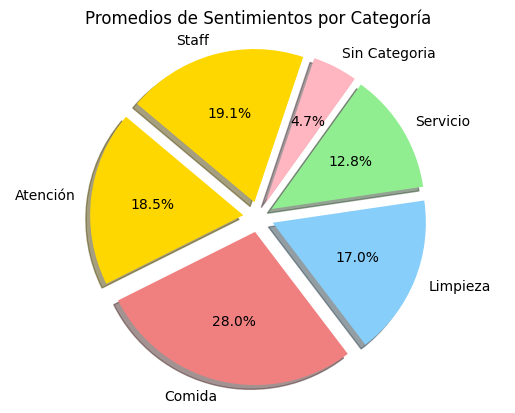

In [81]:
import matplotlib.pyplot as plt

# Tomar el valor absoluto de los promedios de sentimientos
promedios_por_categoria_abs = promedios_por_categoria.abs()

# Crear una figura y un eje para el gráfico de torta
fig, ax = plt.subplots()

# Colores para las categorías (puedes personalizarlos si lo deseas)
colores = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']

# Etiquetas de las categorías
etiquetas = promedios_por_categoria_abs.index

# Valores de los promedios en porcentaje
valores = promedios_por_categoria_abs.values

# Explode para resaltar todas las categorías (ajustado a la longitud de valores)
explode = tuple([0.1] * len(valores))

# Crear el gráfico de torta con etiquetas
ax.pie(valores, explode=explode, labels=etiquetas, colors=colores, autopct='%1.1f%%', shadow=True, startangle=140)

# Título del gráfico
ax.set_title("Promedios de Sentimientos por Categoría")

# Mostrar el gráfico
plt.axis('equal')  # Para que el gráfico de torta sea circular
plt.show()


In [82]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Categoría': ['Atención', 'Comida', 'Limpieza', 'Restaurante', 'Servicio', 'Sin Categoria', 'Staff'],
    'Sentimiento Promedio': [17.179061, 27.222222, 14.920032, 26.477012, 11.861399, -4.403995, 17.697358]
}

df = pd.DataFrame(data)

# Ordenar el DataFrame de mayor a menor por la columna "Sentimiento Promedio"
df_sorted = df.sort_values(by='Sentimiento Promedio', ascending=False)

# Mostrar el DataFrame ordenado como tabla
print(df_sorted)

       Categoría  Sentimiento Promedio
1         Comida             27.222222
3    Restaurante             26.477012
6          Staff             17.697358
0       Atención             17.179061
2       Limpieza             14.920032
4       Servicio             11.861399
5  Sin Categoria             -4.403995


In [83]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con los datos y las columnas necesarias.

# 1. Agrupar el DataFrame por la columna "categorias_palabras_clave"
grupos_categorias = df.groupby('categorias_palabras_clave')

# 2. Calcular el porcentaje de sentimientos positivos y negativos para cada grupo
promedios_por_categoria = grupos_categorias['Sentimiento'].agg(['mean', 'count'])

# Calcular el porcentaje de sentimientos positivos (mayores que 0) y negativos (menores que 0) en cada categoría
promedios_por_categoria['Porcentaje Positivo'] = (promedios_por_categoria['mean'] > 0).sum() / promedios_por_categoria['count'] * 100
promedios_por_categoria['Porcentaje Negativo'] = (promedios_por_categoria['mean'] < 0).sum() / promedios_por_categoria['count'] * 100

# Mostrar los porcentajes de sentimientos positivos y negativos por categoría
print(promedios_por_categoria[['Porcentaje Positivo', 'Porcentaje Negativo']])

KeyError: 'categorias_palabras_clave'